# MLR with transformed y variable and scalars

In [3]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error

In [4]:
# Loading the cleaned data
train = pd.read_csv('../datasets/train_dummies.csv')
test = pd.read_csv('../datasets/test_dummies.csv')

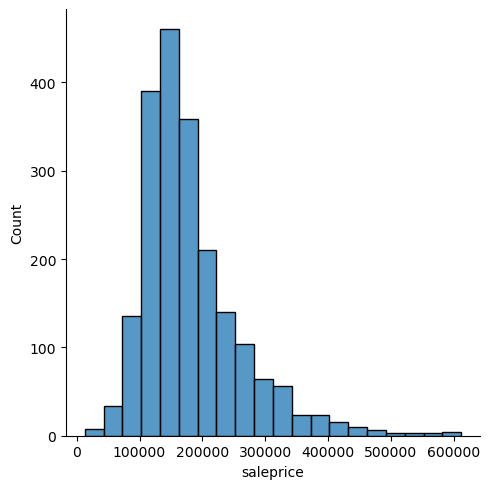

In [5]:
# lets see a distribution of saleprice
sns.displot(train, x="saleprice", bins=20)

In [6]:
# We will log transform it like we did in notebook 2
# train['saleprice'] = np.log1p(train['saleprice'])

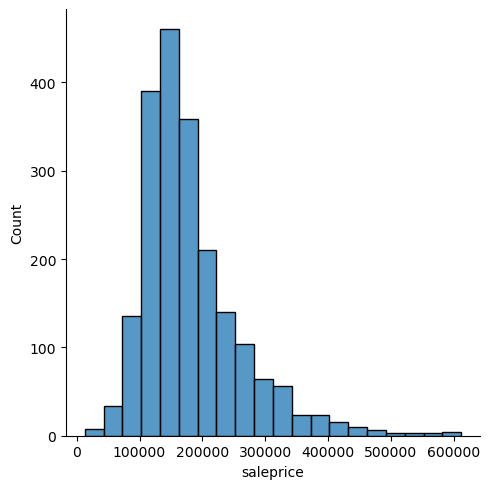

In [7]:
sns.displot(train, x="saleprice", bins=20)

In [8]:
# Now lets apply the last model from Notebook 3
# Train test split
X = train[['overall_qual','age', 'total_bath', 'total_sf', 'totrms_abvgrd', 'remodel_age', 'fireplaces'] + [col for col in train.columns if 'neighborhood' in col] + [col for col in train.columns if 'exter_qual' in col] + [col for col in train.columns if 'bsmt_qual' in col] + [col for col in train.columns if 'sale_type' in col] + [col for col in train.columns if 'functional' in col] + [col for col in train.columns if 'exterior_1st' in col] + [col for col in train.columns if 'garage_finish' in col] + [col for col in train.columns if 'kitchen_qual' in col]]
y = train['saleprice']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
# Init and fitting model
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [10]:
# Making the predictions
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

In [11]:
# R squared of train
r2_score(y_train, y_train_pred)

0.8636988773637957

In [12]:
# RMSE of train
np.sqrt(mean_squared_error(y_train, y_train_pred))

29449.936880929

In [13]:
# R sqaured of test
r2_score(y_test, y_test_pred)

0.8842091294065451

In [14]:
# RMSE of test
np.sqrt(mean_squared_error(y_test, y_test_pred))

26229.24420716645

In [15]:
mae = mean_absolute_error(y_test, y_test_pred)
mae

18230.364137750785

**This will be model we use to address our problem statement**

It address all of the criteria:

* It doesnt have too many features
* its easy to interprate
* Its accurate

**This model explains 88 percent of the variability in saleprice. On average, the predicted sale price is only off by about 18,230.

In [17]:
# Making predictions for kaggle test data set
preds = lr.predict(test[['overall_qual','age', 'total_bath', 'total_sf', 'totrms_abvgrd', 'remodel_age', 'fireplaces'] + [col for col in train.columns if 'neighborhood' in col] + [col for col in train.columns if 'exter_qual' in col] + [col for col in train.columns if 'bsmt_qual' in col] + [col for col in train.columns if 'sale_type' in col] + [col for col in train.columns if 'functional' in col] + [col for col in train.columns if 'exterior_1st' in col] + [col for col in train.columns if 'garage_finish' in col] + [col for col in train.columns if 'kitchen_qual' in col]])

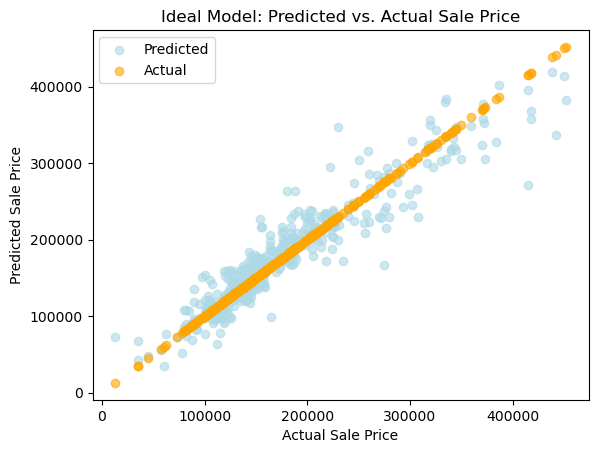

In [18]:
# Scatter plot of actual vs. predicted values
plt.scatter(y_test, y_test_pred, color='lightblue', alpha=0.6, label='Predicted')
plt.scatter(y_test, y_test, color='orange', alpha=0.6, label='Actual')
plt.xlabel("Actual Sale Price")
plt.ylabel("Predicted Sale Price")
plt.title("Ideal Model: Predicted vs. Actual Sale Price")
plt.legend()

plt.savefig('../images/successful_model_pred_vs_act.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

In [19]:
# fitting to kaggle format
submission = pd.DataFrame({'id': test['id']})
submission['saleprice'] = preds
submission.describe()

,id,saleprice
count,878.000000,878.000000
mean,1444.749431,179734.044027
std,850.838263,71295.681469
min,2.000000,23884.403729
25%,692.250000,129790.687462
50%,1433.000000,166354.225489
75%,2197.500000,214325.059601
max,2928.000000,498141.187885


In [20]:
submission.to_csv('../datasets/mlr_model_submission_final.csv', index=False)